# EDA Exploratory Data Analysis

In [17]:
#Ahora vamos a importar los pickles del df del DTM
import pandas as pd
df = pd.read_pickle('./pickles/df_dtm.pkl')
df = df.transpose()
df 

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [2]:
#Revisamos las 30 palabras mas frecuentes entre cada comediante
top_30_words = {}
for i in df.columns:
    top = df[i].sort_values(ascending=False).head(30)
    top_30_words[i] = list(zip(top.index, top.values))
top_30_words

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('oh', 21),
  ('gotta', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('need', 14),
  ('hes', 14),
  ('god', 14),
  ('yeah', 13),
  ('tell', 13),
  ('really', 12),
  ('work', 12)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('thats', 31),
  ('said', 31),
  ('anthony', 27),
  ('say', 26),
  ('day', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('youre', 19),
  ('tell', 19),
  ('right', 18),
  ('grandma', 18),
  ('think', 18),
  ('yeah', 17),
  ('time', 17),
  ('thing', 17),
  ('did', 16),
  ('school', 16),
  ('good', 16),
  ('jokes', 16),
  ('baby', 15),
  ('ive', 15),
  ('gonna', 15),
  ('okay', 15)],
 

In [3]:
#Lo visualizamos de mejor manera para ver las 5 primeras palabras mas usadas por cada uno
print('==============================')
for comedian, top_words in top_30_words.items():
    print(comedian.capitalize())
    for word, freq in top_words[0:5]:
        print(f'\t{word} - {freq}')
    print('==============================')

Ali
	like - 126
	im - 74
	know - 68
	just - 64
	dont - 61
Anthony
	im - 60
	like - 50
	know - 39
	dont - 38
	joke - 34
Bill
	like - 200
	just - 149
	right - 131
	im - 107
	know - 99
Bo
	know - 50
	like - 44
	im - 37
	think - 37
	love - 37
Dave
	like - 103
	know - 79
	said - 63
	just - 61
	im - 47
Hasan
	like - 220
	im - 136
	know - 70
	dont - 64
	dad - 59
Jim
	like - 108
	im - 101
	dont - 90
	right - 81
	fucking - 78
Joe
	like - 143
	people - 100
	just - 87
	dont - 79
	fcking - 69
John
	like - 190
	know - 66
	just - 53
	dont - 52
	said - 39
Louis
	like - 110
	just - 97
	know - 70
	dont - 54
	thats - 51
Mike
	like - 234
	im - 143
	know - 105
	said - 88
	just - 83
Ricky
	right - 111
	like - 80
	just - 66
	im - 66
	dont - 56


In [4]:
#Como vemos que ciertas palabras se repiten entre todos los comediantes,
# vamos a retirar las palabras que esten en el top 30 si se repite en mas de 3 comediantes

#para empezar vamos a poner las 30 palabras de cada comediante en una sola lista
from collections import Counter
words =[]
for comedian in df.columns:
    top = [word for (word,count) in top_30_words[comedian]]
    for i in top:
        words.append(i)
words 

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'shit',
 'youre',
 'gonna',
 'ok',
 'lot',
 'wanna',
 'oh',
 'gotta',
 'husband',
 'got',
 'time',
 'right',
 'cause',
 'day',
 'women',
 'people',
 'pregnant',
 'need',
 'hes',
 'god',
 'yeah',
 'tell',
 'really',
 'work',
 'im',
 'like',
 'know',
 'dont',
 'joke',
 'got',
 'thats',
 'said',
 'anthony',
 'say',
 'day',
 'just',
 'guys',
 'people',
 'youre',
 'tell',
 'right',
 'grandma',
 'think',
 'yeah',
 'time',
 'thing',
 'did',
 'school',
 'good',
 'jokes',
 'baby',
 'ive',
 'gonna',
 'okay',
 'like',
 'just',
 'right',
 'im',
 'know',
 'dont',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'youre',
 'thats',
 'dude',
 'fuck',
 'want',
 'think',
 'people',
 'did',
 'hes',
 'guy',
 'didnt',
 'make',
 'come',
 'thing',
 'going',
 'theyre',
 'let',
 'theres',
 'little',
 'know',
 'like',
 'im',
 'think',
 'love',
 'bo',
 'just',
 'stuff',
 'repeat',
 'dont',
 'yeah',
 'want',
 'right',
 'cos',
 'fucking',
 'people',
 'eye',
 's

In [5]:
#Ahora vamos a contar las palabras de la lista anterior dandonos asi en cuantos top de los comediantes aparecen estas palabras
top_count = Counter(words).most_common()
top_count

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('time', 8),
 ('think', 8),
 ('oh', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('really', 6),
 ('say', 6),
 ('going', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fucking', 5),
 ('fuck', 5),
 ('want', 5),
 ('theyre', 5),
 ('theres', 5),
 ('did', 4),
 ('didnt', 4),
 ('little', 4),
 ('guys', 3),
 ('ive', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('school', 2),
 ('dude', 2),
 ('guy', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('old', 2),
 ('mean', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('god', 1),
 ('work', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('jokes', 1),
 ('baby', 1),
 ('o

In [6]:
#Ahora aplicamos la restriccion, si mas de 6 comediantes tienen la palabra en su top, se vuelve un stopword
add_stopwords = [w for w, count in top_count if count > 6]
add_stopwords

['like',
 'im',
 'know',
 'just',
 'dont',
 'thats',
 'right',
 'people',
 'youre',
 'got',
 'gonna',
 'time',
 'think',
 'oh',
 'yeah',
 'said']

In [7]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
#Traemos la data limpia de antes para hacer un nuevo DTM con las nuevas stopwords
df_clean = pd.read_pickle('./pickles/df_clean2.pkl')

#Agregamos las stop words que sacamos
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

#Recreamos la DTM
vectorizer = CountVectorizer(stop_words=stop_words)
df_cv = vectorizer.fit_transform(df_clean.transcript)
df_stopwords = pd.DataFrame(df_cv.toarray(), columns=vectorizer.get_feature_names_out())
df_stopwords.index = df_clean.index
#pickeleamos la DTM con las nuevas stopwords
import pickle
pickle.dump(vectorizer, open('./pickles/vectorizer_stopw.pkl', 'wb'))
df_stopwords.to_pickle('./pickles/df_dtm_stopwords.pkl')

## WordCloud
 Creando una nube de las palabras más repetidas por cada comediante

In [8]:
from wordcloud import WordCloud
#agregamos los parametros globales para el wordcloud. Aqui agregamos la variable previamente establecida de stopwords
#que incluian no solo las de base de sklearn.feature_extraction.text.ENGLISH_STOP_WORDS, sino tambien las nuevas que sacamos
wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=140, random_state=42)

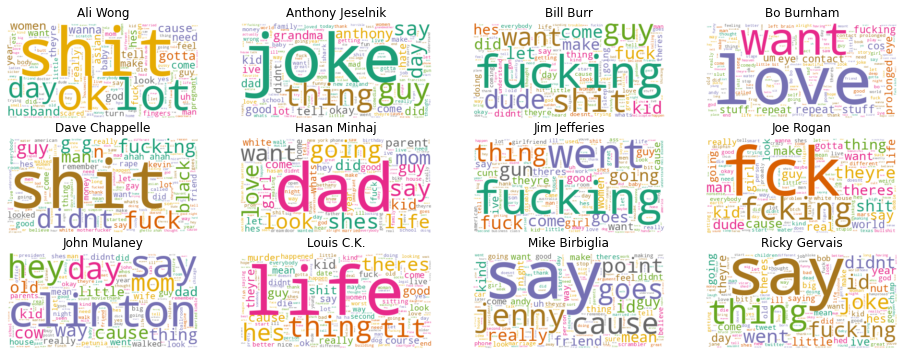

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 6]
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']
#Creando subplots de cada comendiante usando el data clean ya que ahi esta el texto completo en una sola columna,
# wordcloud ya se encarga de contarlos
for i,comediante in enumerate(df.columns):
    wc.generate(df_clean.transcript[comediante])
    
    plt.subplot(3,4,i+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(full_names[i])
    plt.axis('off')
plt.show()

## Número de palabras
Identificando el número de palabras únicas utilizadas por cada comediante. También viendo la velocidad a la que hablan extrayendo la duración 
del show del cual se extrajo la transcripción

In [10]:
#sacando las palabras que se dice por lo menos una vez en el df dtm original sin stopwords nuevas
uniques_list = []
for comedian in df.columns:
    uniques = df[comedian].to_numpy().nonzero()[0].size
    uniques_list.append(uniques)

#Creando un nuevo df que contenga el conteo de palabras unicas por comediante y ordenado de mayor a menor
df_uwords= pd.DataFrame(list(zip(full_names, uniques_list)), columns=['comediante', 'palabras_únicas'])
df_uwords_sorted= df_uwords.sort_values(by='palabras_únicas', ascending=False)
df_uwords_sorted

,comediante,palabras_únicas
2,Bill Burr,1633
11,Ricky Gervais,1630
5,Hasan Minhaj,1551
10,Mike Birbiglia,1486
7,Joe Rogan,1434
8,John Mulaney,1399
4,Dave Chappelle,1385
0,Ali Wong,1332
6,Jim Jefferies,1313
3,Bo Burnham,1271


In [11]:
#Calculando las palabras por minuto de cada comediante

#empezamos calculando el número total de palabras dichas por cada comediante
total_words = []
for comedian in df.columns:
    total = df[comedian].to_numpy().sum()
    total_words.append(total)
#Lo visualizamos de mejor manera
list(zip(full_names,total_words))

[('Ali Wong', 3278),
 ('Anthony Jeselnik', 2904),
 ('Bill Burr', 5535),
 ('Bo Burnham', 3165),
 ('Dave Chappelle', 4065),
 ('Hasan Minhaj', 4753),
 ('Jim Jefferies', 4764),
 ('Joe Rogan', 4579),
 ('John Mulaney', 4019),
 ('Louis C.K.', 3337),
 ('Mike Birbiglia', 4744),
 ('Ricky Gervais', 4972)]

In [12]:
#Añadimos data extraida de IMDB para obtener la duración del show en minutos de cada comediante
duration = [60, 59, 80, 60, 67, 73, 77, 63, 62, 58, 76, 79]
df_uwords['duración'] = duration
df_uwords['total_palabras'] = total_words
df_uwords['palabras_por_minuto'] = df_uwords['total_palabras']/df_uwords['duración']
df_uwords

,comediante,palabras_únicas,duración,total_palabras,palabras_por_minuto
0,Ali Wong,1332,60,3278,54.633333
1,Anthony Jeselnik,979,59,2904,49.220339
2,Bill Burr,1633,80,5535,69.187500
3,Bo Burnham,1271,60,3165,52.750000
4,Dave Chappelle,1385,67,4065,60.671642
5,Hasan Minhaj,1551,73,4753,65.109589
6,Jim Jefferies,1313,77,4764,61.870130
7,Joe Rogan,1434,63,4579,72.682540
8,John Mulaney,1399,62,4019,64.822581
9,Louis C.K.,1081,58,3337,57.534483


In [13]:
#Ordenamos de mayor a menor el df por palabras por minuto
df_wpm_sorted = df_uwords.sort_values(by='palabras_por_minuto', ascending=False)
df_wpm_sorted

,comediante,palabras_únicas,duración,total_palabras,palabras_por_minuto
7,Joe Rogan,1434,63,4579,72.682540
2,Bill Burr,1633,80,5535,69.187500
5,Hasan Minhaj,1551,73,4753,65.109589
8,John Mulaney,1399,62,4019,64.822581
11,Ricky Gervais,1630,79,4972,62.936709
10,Mike Birbiglia,1486,76,4744,62.421053
6,Jim Jefferies,1313,77,4764,61.870130
4,Dave Chappelle,1385,67,4065,60.671642
9,Louis C.K.,1081,58,3337,57.534483
0,Ali Wong,1332,60,3278,54.633333


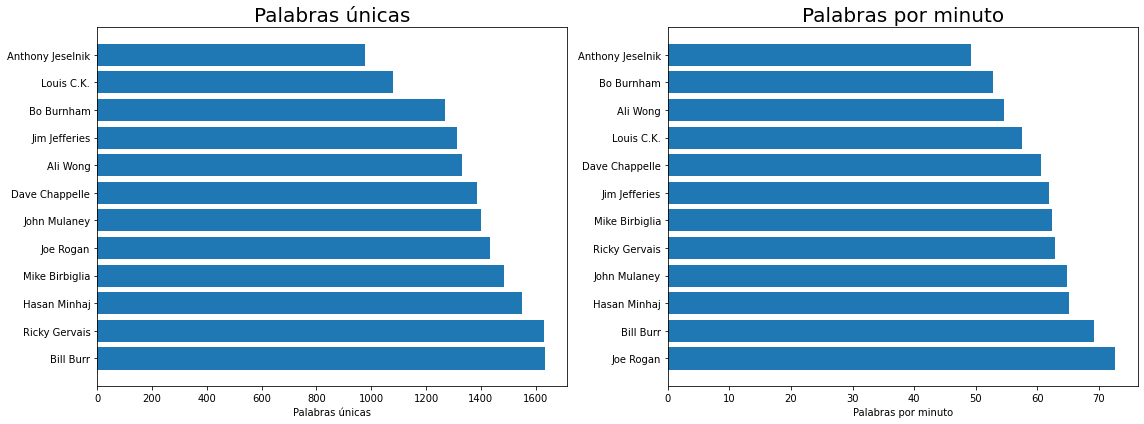

In [14]:
#Vamos a plotear los resultados de palabras unicas y palabras por minuto
import numpy as np
y_pos = np.arange(len(df_uwords))

#palabras unicas
plt.subplot(1,2,1)
plt.barh(y_pos,df_uwords_sorted['palabras_únicas'] )
plt.yticks(y_pos, df_uwords_sorted['comediante'])
plt.xlabel('Palabras únicas')
plt.title('Palabras únicas', fontsize = 20)
#palabras por minuto
plt.subplot(1,2,2)
plt.barh(y_pos,df_wpm_sorted['palabras_por_minuto'])
plt.yticks(y_pos, df_wpm_sorted['comediante'])
plt.xlabel('Palabras por minuto')
plt.title('Palabras por minuto', fontsize = 20)

plt.tight_layout()
plt.show()

## Análisis de palabras obscenas
Vamos a ver cuántas malas palabras dice cada comediante en su sketch

In [39]:
data_obsw = df.transpose()[['fucking', 'fuck', 'fck','fcking', 'shit']]
df_profanity = pd.concat([data_obsw.fuck + data_obsw.fucking + data_obsw.fck +data_obsw.fcking, data_obsw.shit], axis=1)
df_profanity.columns = ['f___', 's___']
df_profanity

,f___,s___
ali,16,34
anthony,15,9
bill,106,63
bo,38,6
dave,65,46
hasan,24,15
jim,115,20
joe,135,40
john,4,6
louis,21,25


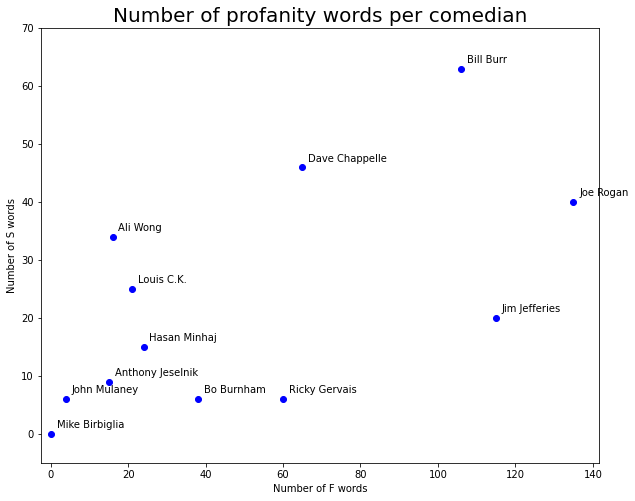

In [53]:
#Como son dos variables (fucks y shits) vamos a crear un scatterplot para ver si hay correlación
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(df_profanity.index):
    x= df_profanity.f___.loc[comedian]
    y= df_profanity.s___.loc[comedian]
    plt.scatter(x,y, label=comedian, color = 'blue')
    plt.text(x+1.5,y+1,full_names[i], fontsize=10)
    plt.ylim(-5,70)
plt.title('Number of profanity words per comedian', fontsize = 20)
plt.xlabel('Number of F words')
plt.ylabel('Number of S words')
plt.show()